In [25]:
import numpy as np
import pandas as pd
import rasterio
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns

In [2]:
# Path to your LULC GeoTIFF file
lulc_path = r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\LULC\UP_LULC_2012.tif'

# Open the GeoTIFF file
with rasterio.open(lulc_path) as src:
    # Get the number of bands
    num_bands = src.count
    lulc_data = src.read(1)

    # Print information about the GeoTIFF
    print(f"Number of Bands: {num_bands}")
    print(f"Width: {src.width}, Height: {src.height}")
    print(f"CRS (Coordinate Reference System): {src.crs}")
    print(f"Transform (Affine Transformation): {src.transform}")
    print(f"Metadata: {src.meta}")


Number of Bands: 1
Width: 14816, Height: 12839
CRS (Coordinate Reference System): EPSG:4326
Transform (Affine Transformation): | 0.00, 0.00, 77.10|
| 0.00,-0.00, 30.41|
| 0.00, 0.00, 1.00|
Metadata: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 14816, 'height': 12839, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.000509090909090909, 0.0, 77.09621818181817,
       0.0, -0.0005090909090909091, 30.408)}


In [3]:
# Data Preprocessing

# Rescale the pixel values to a range [0, 1] (Normalization)
normalized_lulc = lulc_data.astype(float) / np.max(lulc_data)

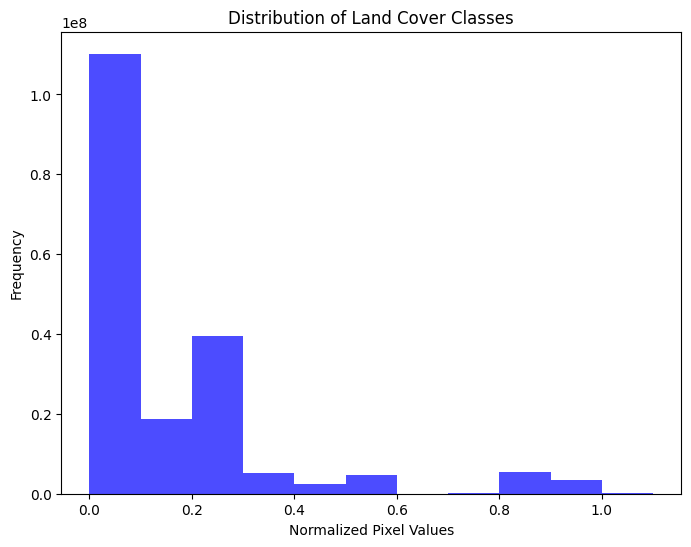

In [4]:
# Data Exploration

# Visualize the distribution of land cover classes
plt.figure(figsize=(8, 6))
plt.hist(normalized_lulc.flatten(), bins=np.arange(0, 1.2, 0.1), color='blue', alpha=0.7)
plt.title('Distribution of Land Cover Classes')
plt.xlabel('Normalized Pixel Values')
plt.ylabel('Frequency')
plt.show()


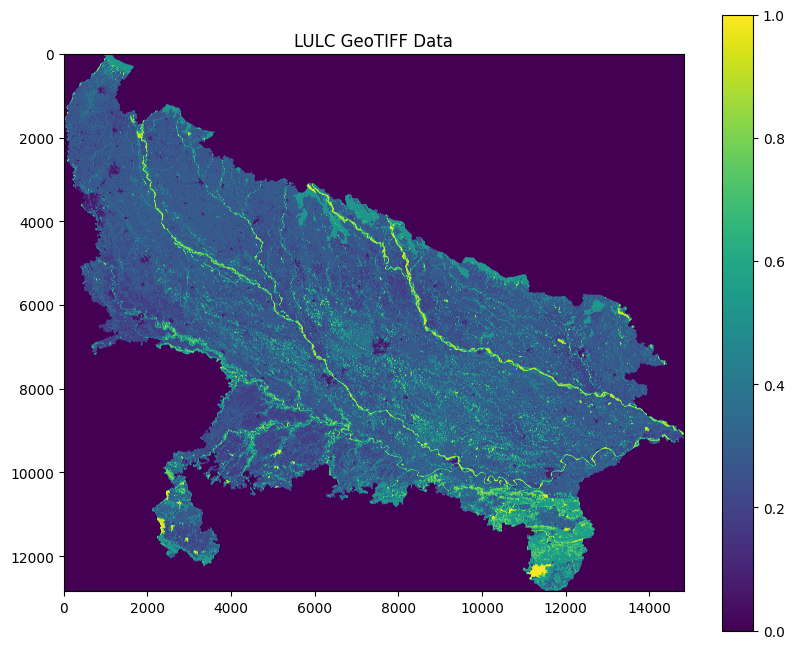

In [5]:
# Visualize the LULC data
plt.figure(figsize=(10, 8))
plt.imshow(normalized_lulc, cmap='viridis')
plt.title('LULC GeoTIFF Data')
plt.colorbar()
plt.show()

In [6]:

# Legend mapping class labels to RGB colors
class_legend = {
    1: ('Built-up', [255, 0, 0]),
    2: ('Kharif Crop', [255, 209, 0]),
    3: ('Rabi Crop', [255, 158, 0]),
    4: ('Zaid Crop', [158, 81, 43]),
    5: ('Double/Triple Crop', [158, 207, 31]),
    6: ('Current Fallow', [245, 245, 219]),
    7: ('Plantation', [0, 204, 0]),
    8: ('Evergreen Forest', [0, 94, 0]),
    9: ('Deciduous Forest', [107, 120, 31]),
    10: ('Degraded/Scrub Forest', [115, 184, 43]),
    11: ('Littoral Swamp', [5, 130, 94]),
    12: ('Grassland', [184, 234, 120]),
    13: ('Shifting Cultivation', [158, 31, 235]),
    14: ('Wasteland', [209, 181, 133]),
    15: ('Rann', [191, 191, 191]),
    16: ('Waterbodies max', [94, 209, 242]),
    17: ('Waterbodies min', [0, 158, 222]),
    18: ('Snow Cover', [255, 191, 196]),
}

In [10]:
print(np.unique(lulc_data))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 16 17]


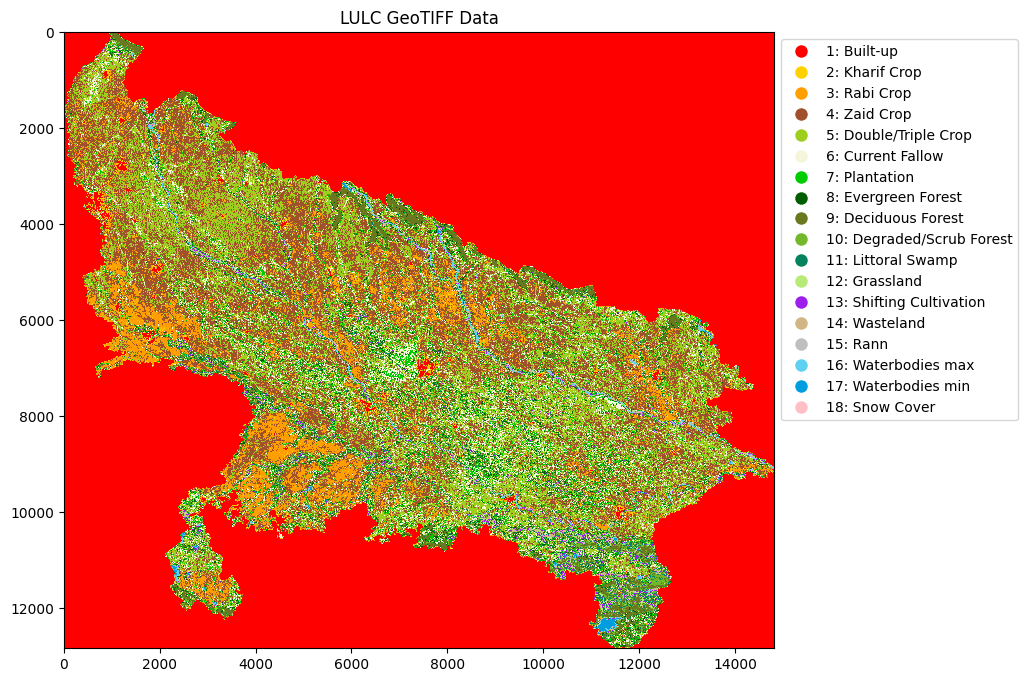

In [19]:
colors = [np.array(class_legend[i][1]) / 255.0 for i in range(1, len(class_legend) + 1)]
cmap = ListedColormap(colors)

# Visualize the LULC data using imshow
plt.figure(figsize=(10, 8))
plt.imshow(lulc_data, cmap=cmap, vmin=1, vmax=len(class_legend))
plt.title('LULC GeoTIFF Data')


# Create a legend
legend_labels = [f"{label}: {class_name}" for label, (class_name, _) in class_legend.items()]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in colors],
           labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

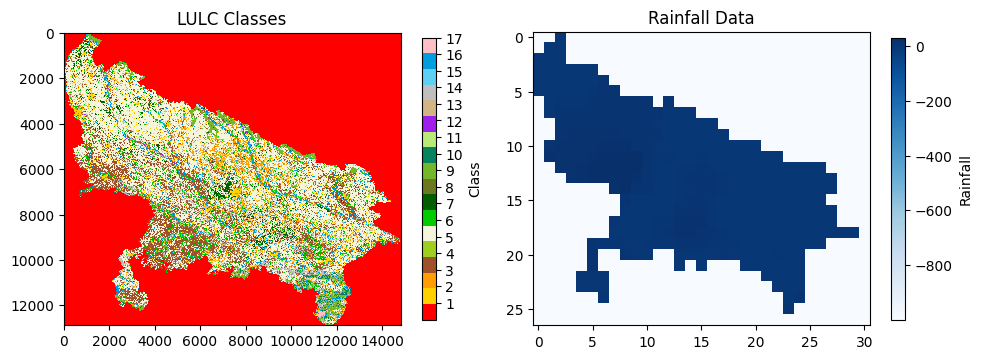

In [21]:
import rasterio
import pandas as pd


# Path to your rainfall GeoTIFF file
rainfall_path = r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\Rainfall\UP_Rainfall_2012.tif'

# Open LULC and rainfall geotiff files
with rasterio.open(lulc_path) as lulc_dataset, rasterio.open(rainfall_path) as rainfall_dataset:
    # Read data into numpy arrays
    lulc_data = lulc_dataset.read(1)
    rainfall_data = rainfall_dataset.read(1)

    # Plot LULC data
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(lulc_data, cmap=cmap, interpolation='none')
    plt.title('LULC Classes')
    plt.colorbar(shrink=0.6, ticks=np.arange(1, 18), label='Class')

    # Plot Rainfall data
    plt.subplot(1, 2, 2)
    plt.imshow(rainfall_data, cmap='Blues', interpolation='none')
    plt.title('Rainfall Data')
    plt.colorbar(shrink=0.6, label='Rainfall')

    plt.tight_layout()
    plt.show()

In [40]:
import rasterio

with rasterio.open(r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\LULC\UP_LULC_2012.tif') as src:
    land_cover_data = src.read(1)
    print("Land Cover Summary Statistics:")
    print("Min:", land_cover_data.min())
    print("Max:", land_cover_data.max())
    print("Mean:", land_cover_data.mean())
    print("Std:", land_cover_data.std())

with rasterio.open(r'C:\Users\aniru\Machine Learning\Space Hackathon\Group-2\Topic-2\UttarPradesh\Rainfall\UP_Rainfall_2012.tif') as src:
    rainfall_data = src.read(1)
    print("\nRainfall Summary Statistics:")
    print("Min:", rainfall_data.min())
    print("Max:", rainfall_data.max())
    print("Mean:", rainfall_data.mean())
    print("Std:", rainfall_data.std())


Land Cover Summary Statistics:
Min: 0
Max: 17
Mean: 2.5421733641945767
Std: 3.764040979143403

Rainfall Summary Statistics:
Min: -999.0
Max: 31.460428
Mean: -587.0557
Std: 494.39517


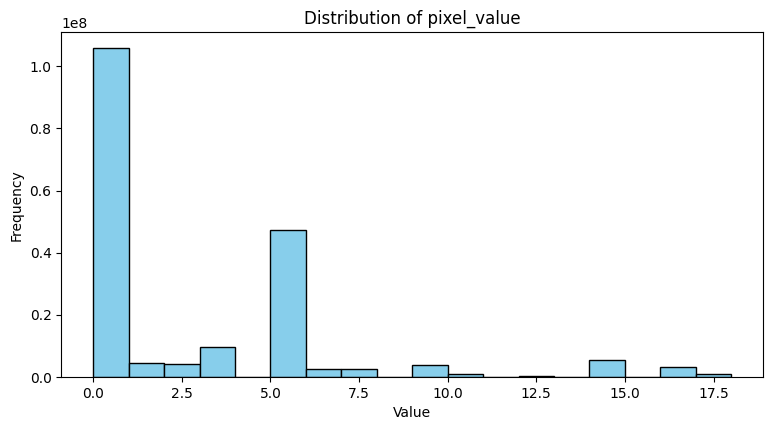

In [31]:

# Plot the distribution for each column
plt.figure(figsize=(15, 8))

for column in df.columns:
    plt.subplot(2, 2, df.columns.get_loc(column) + 1)
    plt.hist(df[column], bins=range(19), color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
